In [3]:
from sg396_driver_v1 import SG396
from pulsestreamer import PulseStreamer, Sequence

import matplotlib.pyplot as plt
import numpy as np

In [4]:
sg = SG396('TCPIP::10.135.70.65::inst0::INSTR')

ps = PulseStreamer('10.135.70.193')

connected to SG396 [TCPIP::10.135.70.65::inst0::INSTR]
Connect to Pulse Streamer via JSON-RPC.
IP / Hostname: 10.135.70.193
Pulse Streamer 8/2 firmware: v1.5.2
Client software: v1.7.0
Your client software is more up to date than the Pulse Streamer 8/2 firmware. We recommend updating the firmware of your Pulse Streamer 8/2.
For detailed information visit https://www.swabianinstruments.com/pulse-streamer-8-2/downloads/ or contact support@swabianinstruments.com


In [5]:
num_pts = 10

analog_FM_voltages = np.linspace(-1,1,num_pts)
# print(analog_FM_voltages)

In [6]:
carrier = 2.3e9 # frequency to modulate for ODMR [Hz]
mod_rate = 2

match carrier:
    case freq if 93.75e6 <= freq < 189.84375e6:
        deviation = 1e6
    case freq if 189.84375e6 <= freq < 379.6875e6:
        deviation = 2e6
    case freq if 379.6875e6 <= freq < 759.375e6:
        deviation = 4e6
    case freq if 759.375e6 <= freq < 1.51875e9:
        deviation = 8e6
    case freq if 1.51875e9 <= freq < 3.0375e9:
        deviation = 16e6
    case freq if 3.0375e9 <= freq < 6.075e9:
        deviation = 32e6

def single_seq(voltage):
    seq = ps.createSequence()

    mw_on = 1e9/mod_rate
    mw_off = 1e9/mod_rate

    analog_seq = [(mw_on + mw_off, voltage)]
    switch_seq = [(mw_on, 0), (mw_off, 1)]

    seq.setAnalog(0,analog_seq)
    seq.setDigital(6, switch_seq)
    
    return seq

seqs = ps.createSequence()

for v in analog_FM_voltages:
    seqs += single_seq(v)

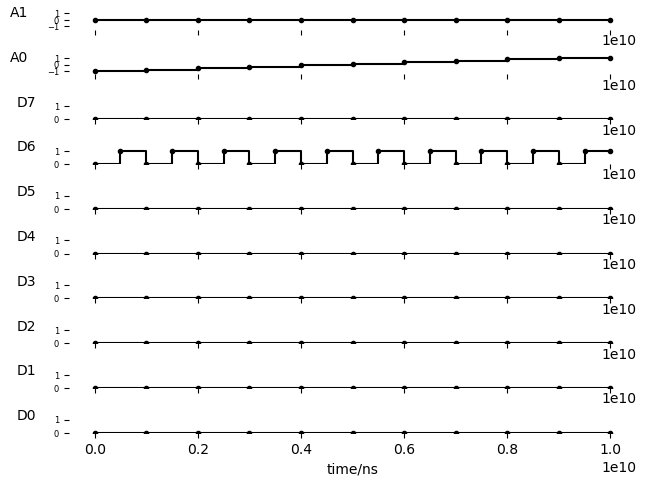

In [7]:
seqs.plot()

In [13]:
sg.set_mod_type(1) # frequency modulation
sg.set_mod_subtype(0) # analog (no constellation mapping)
sg.set_mod_function('FM',5) # external modulation 
# sg.set_mod_rate(mod_rate) 
sg.set_FM_mod_dev(deviation) 
sg.set_mod_toggle(1)

sg.set_rf_amplitude(1e-9) # set low amplitude
sg.set_frequency(carrier) # set 2.3 GHz carrier
# sg.set_rf_toggle(1)

# ps.stream(seqs, 1)

In [14]:
sg.set_mod_type(7) # QAM modulation
sg.set_mod_subtype(1) # vector (no constellation mapping)
sg.set_mod_function('IQ',5) # external modulation 
# sg.set_mod_rate(mod_rate) 
sg.set_FM_mod_dev(deviation) 
sg.set_mod_toggle(1)

sg.set_rf_amplitude(1e-9) # set low amplitude
sg.set_frequency(carrier) # set 2.3 GHz carrier
# sg.set_rf_toggle(1)

# ps.stream(seqs, 1)

In [10]:
sg.set_rf_toggle(0)
sg.set_mod_toggle(0)
# ps.forceFinal()